In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:

data = pd.read_csv("/Users/zahiramohammed/Desktop/DAPM_dataset_new.csv")

In [4]:
data.head(1)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,35.0,0,0,0,23.47,6.6,90,0


In [4]:
X = data[['age', 'bmi', 'blood_glucose_level']] 

Cluster Statistics:
   Cluster    gender        age  hypertension  heart_disease  smoking_history  \
0        0  0.510638  41.992908      0.035461       0.049645        -0.148936   
1        1  0.573770  50.737705      0.163934       0.065574        -0.098361   
2        2  0.640940  42.687114      0.070470       0.026846        -0.137584   

         bmi  HbA1c_level  blood_glucose_level  diabetes  
0  26.519149     5.302837            88.510638  0.000000  
1  28.334754     6.073770           219.672131  0.442623  
2  28.674866     5.431544           145.010067  0.077181  


/Users/zahiramohammed/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


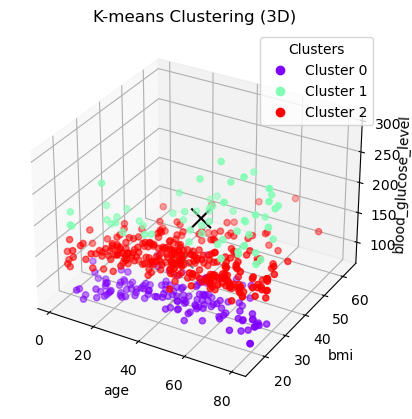

In [6]:


number_of_clusters = 3

kmeans = KMeans(n_clusters=number_of_clusters, random_state=42)

kmeans.fit(X)

cluster_labels = kmeans.labels_

data['Cluster'] = cluster_labels

cluster_centers = kmeans.cluster_centers_

cluster_stats = data.groupby('Cluster').mean().reset_index()

print("Cluster Statistics:")
print(cluster_stats)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X['age'], X['bmi'], X['blood_glucose_level'], c=cluster_labels, cmap='rainbow')
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2], marker='x', s=200, c='black')

ax.set_xlabel('age')
ax.set_ylabel('bmi')
ax.set_zlabel('blood_glucose_level',labelpad=-2, y=1.0, rotation=1)
ax.set_title('K-means Clustering (3D)')

legend_labels = [f'Cluster {i}' for i in range(number_of_clusters)]
ax.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title="Clusters")

plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)
data_scaled

array([[-0.41741621, -0.68656703, -1.14652181],
       [ 0.51854759, -0.84782994, -0.90858511],
       [ 0.86337635, -0.78000909,  0.47144779],
       ...,
       [ 0.51854759, -0.33691288, -1.26549017],
       [ 1.70081764,  0.69999254,  0.49524146],
       [ 0.96189886,  2.96973028, -0.19477499]])

/Users/zahiramohammed/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zahiramohammed/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zahiramohammed/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zahiramohammed/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default 

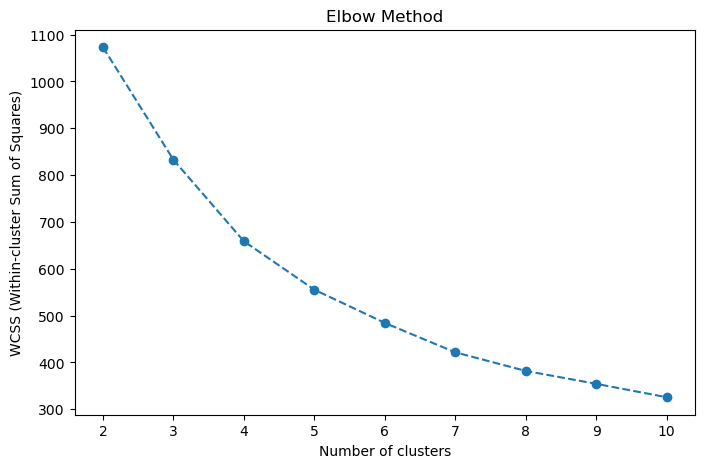

In [10]:
# Determine the optimal number of clusters (K)
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-cluster Sum of Squares)')
plt.show()

In [11]:
from sklearn.metrics import silhouette_score

In [12]:
score = silhouette_score(X, cluster_labels)
print('Silhouette Score:', score)

Silhouette Score: 0.48590039523739925
